In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as snb
from funciones import *
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


In [2]:
salaries=pd.read_csv('../data/salaries_data.csv')
testeo=pd.read_csv('../data/testeo.csv')

In [3]:
salaries.head()
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   salary              500 non-null    int64 
 5   salary_currency     500 non-null    object
 6   salary_in_usd       500 non-null    int64 
 7   employee_residence  500 non-null    object
 8   remote_ratio        500 non-null    int64 
 9   company_location    500 non-null    object
 10  company_size        500 non-null    object
dtypes: int64(4), object(7)
memory usage: 43.1+ KB


In [4]:
salaries.job_title=salaries.job_title.apply(title)



In [5]:
salaries.job_title.unique()


salaries.job_title.value_counts()

Data Engineer                191
Data Scientist               179
Data Analyst                 110
Machine Learning Engineer     20
Name: job_title, dtype: int64

In [6]:
salaries.drop(columns=['salary_currency', 'salary','employee_residence' ], inplace=True)   

In [7]:
salaries.company_location.unique()

array(['US', 'FR', 'GR', 'LU', 'SI', 'DE', 'IN', 'GB', 'PK', 'MD', 'JP',
       'CA', 'AS', 'IE', 'AE', 'MX', 'VN', 'BE', 'KE', 'ES', 'CH', 'CL',
       'CN', 'DK', 'TR', 'NZ', 'PL', 'UA', 'AU', 'NG', 'EE', 'CZ', 'AT',
       'BR', 'DZ', 'IR', 'NL', 'HU', 'PT', 'HN', 'MT', 'RO', 'SG'],
      dtype=object)

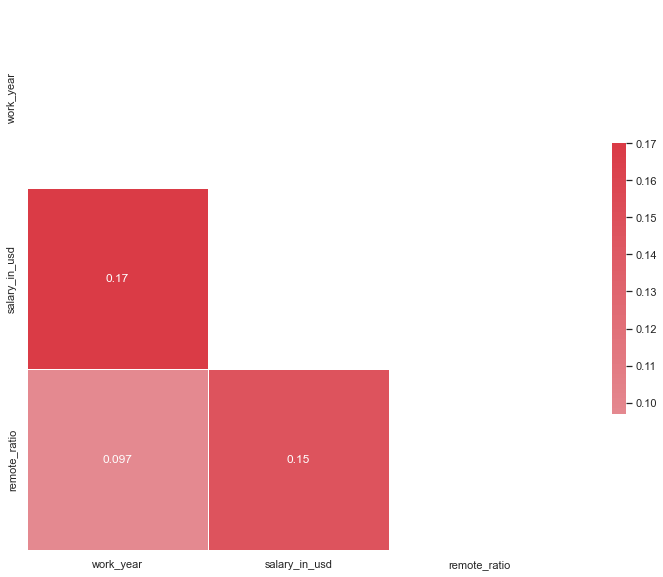

In [8]:
import seaborn as sns

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(salaries.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(salaries.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [9]:
salaries.company_size.unique()

salaries.company_size=LabelEncoder().fit_transform(salaries.company_size)
salaries.experience_level=LabelEncoder().fit_transform(salaries.experience_level)
salaries.remote_ratio=LabelEncoder().fit_transform(salaries.remote_ratio)
salaries.employment_type=LabelEncoder().fit_transform(salaries.employment_type)
salaries.job_title=LabelEncoder().fit_transform(salaries.job_title)
#salaries.company_location=pd.get_dummies(salaries.company_location, columns=['cut'], drop_first=True)
salaries.company_location=LabelEncoder().fit_transform(salaries.company_location)

In [10]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split as tts 

X=salaries.drop(columns=['salary_in_usd'])
y=salaries.salary_in_usd
X_train, X_test, y_train, y_test=tts(X, y, random_state=42)

In [12]:
X.shape

(500, 7)

In [13]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error as mse 
linreg=LinReg()
linreg.fit(X_train, y_train)
y_pred=linreg.predict(X_test)


In [14]:
testeo.company_size=LabelEncoder().fit_transform(testeo.company_size)
testeo.experience_level=LabelEncoder().fit_transform(testeo.experience_level)
testeo.remote_ratio=LabelEncoder().fit_transform(testeo.remote_ratio)
testeo.employment_type=LabelEncoder().fit_transform(testeo.employment_type)
testeo.job_title=LabelEncoder().fit_transform(testeo.job_title)
#testeo.company_location=pd.get_dummies(testeo.company_location, columns=['cut'], drop_first=True)
testeo.company_location=LabelEncoder().fit_transform(testeo.company_location)
testeo.drop(columns=['salary_currency', 'salary','employee_residence' ], inplace=True)   

y_pred2=linreg.predict(testeo)

In [15]:
y_pred2=pd.DataFrame(y_pred2, columns=['salary_in_usd'])

In [16]:
y_pred2.to_csv('../data/prueba1.csv',index_label='id')

OSError: Cannot save file into a non-existent directory: 'data'

In [17]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [18]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

from xgboost import XGBRegressor as XGBR

from catboost import CatBoostRegressor as CTR

from lightgbm import LGBMRegressor as LGBMR

from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet   # regularizacion L1+L2

from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR

from sklearn.svm import SVR 

linreg=LinReg()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()
rfr=RFR()
etr=ETR()
gbr=GBR()
xgbr=XGBR()
ctr=CTR()
lgbmr=LGBMR()
svr=SVR()

modelos=[linreg, lasso, ridge, elastic,svr,rfr,etr,gbr,xgbr,ctr,lgbmr]

for m in modelos:
    m.fit(X_train, y_train)
    
pred_lin=linreg.predict(X)
pred_lasso=lasso.predict(X)
pred_rig=ridge.predict(X)
pred_elas=elastic.predict(X)
pred_svr=svr.predict(X)
pred_rfr=rfr.predict(X)
pred_etr=etr.predict(X)
pred_gbr=gbr.predict(X)
pred_xgbr=xgbr.predict(X)
pred_ctr=ctr.predict(X)
pred_lgbmr=lgbmr.predict(X)


Learning rate set to 0.035065
0:	learn: 70645.8919873	total: 138ms	remaining: 2m 18s
1:	learn: 69738.9704188	total: 139ms	remaining: 1m 9s
2:	learn: 68919.8845496	total: 139ms	remaining: 46.2s
3:	learn: 68172.5485173	total: 139ms	remaining: 34.7s
4:	learn: 67621.6213121	total: 140ms	remaining: 27.9s
5:	learn: 67073.2183439	total: 141ms	remaining: 23.3s
6:	learn: 66431.4442065	total: 141ms	remaining: 20s
7:	learn: 65809.5399643	total: 141ms	remaining: 17.5s
8:	learn: 65244.1840379	total: 142ms	remaining: 15.6s
9:	learn: 64736.9848733	total: 142ms	remaining: 14.1s
10:	learn: 64182.5829160	total: 143ms	remaining: 12.8s
11:	learn: 63596.5529360	total: 143ms	remaining: 11.8s
12:	learn: 63157.6492805	total: 144ms	remaining: 10.9s
13:	learn: 62656.8922671	total: 144ms	remaining: 10.1s
14:	learn: 62249.1179814	total: 145ms	remaining: 9.5s
15:	learn: 61772.3070964	total: 145ms	remaining: 8.93s
16:	learn: 61370.6197369	total: 146ms	remaining: 8.42s
17:	learn: 60848.5666843	total: 146ms	remaining

In [19]:
y.shape

(500,)

In [ ]:
print('lineal',mse(y, pred_lin, squared=False))
print('lasso',mse(y, pred_lasso, squared=False))
print('rig',mse(y, pred_rig, squared=False))
print('elas',mse(y, pred_elas, squared=False))
print('svr',mse(y, pred_svr, squared=False))
print('rfr',mse( y, pred_rfr, squared=False))
print('etr',mse( y, pred_etr, squared=False))
print('gbr',mse( y, pred_gbr, squared=False))
print('xgbr',mse(y, pred_xgbr, squared=False))
print('ctr',mse( y, pred_ctr, squared=False))
print('lgbmr',mse( y, pred_lgbmr, squared=False))



lineal 58664.33940936387
lasso 58663.984725788854
rig 58621.79810822285
elas 59343.24405575249
svr 70476.51925199425
rfr 39922.06058970533
etr 37476.33309069873
gbr 44212.3945770195
xgbr 38031.42640463912
ctr 38020.85781819432
lgbmr 47572.07119982864


In [ ]:
pred_elas=elastic.predict(testeo)
pred_gbr=gbr.predict(testeo)
pred_xgbr=xgbr.predict(testeo)
pred_ctr=ctr.predict(testeo)
pred_lgbmr=lgbmr.predict(testeo)

In [ ]:
pred_elas=pd.DataFrame(pred_elas, columns=['salary_in_usd'])

pred_elas.to_csv('../data/elas.csv',index_label='id')

pred_gbr=pd.DataFrame(pred_gbr, columns=['salary_in_usd'])

pred_gbr.to_csv('../data/gbr.csv',index_label='id')

pred_xgbr=pd.DataFrame(pred_xgbr, columns=['salary_in_usd'])

pred_xgbr.to_csv('../data/xgbr.csv',index_label='id')

pred_ctr=pd.DataFrame(pred_ctr, columns=['salary_in_usd'])

pred_ctr.to_csv('../data/ctr.csv',index_label='id')

pred_lgbmr=pd.DataFrame(pred_lgbmr, columns=['salary_in_usd'])

pred_lgbmr.to_csv('../data/lgbmr.csv',index_label='id')